In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
from scipy.signal import find_peaks, convolve, medfilt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import matplotlib as mpl
from glob import glob
from copy import copy
from natsort import natsorted
from pandas import DataFrame


%matplotlib widget

In [2]:
# freqs, dark_s21 = np.load('./VNAsweep.npy')
dark_s21 = np.load('.\S21s\S21_w1_blue_10h34_11-10-2024_dark.npy')
freqs = np.load('.\S21s\S21_w1_blue_10h34_11-10-2024_freqs.npy')
M_pxs = 20
N_pxs = 20

395


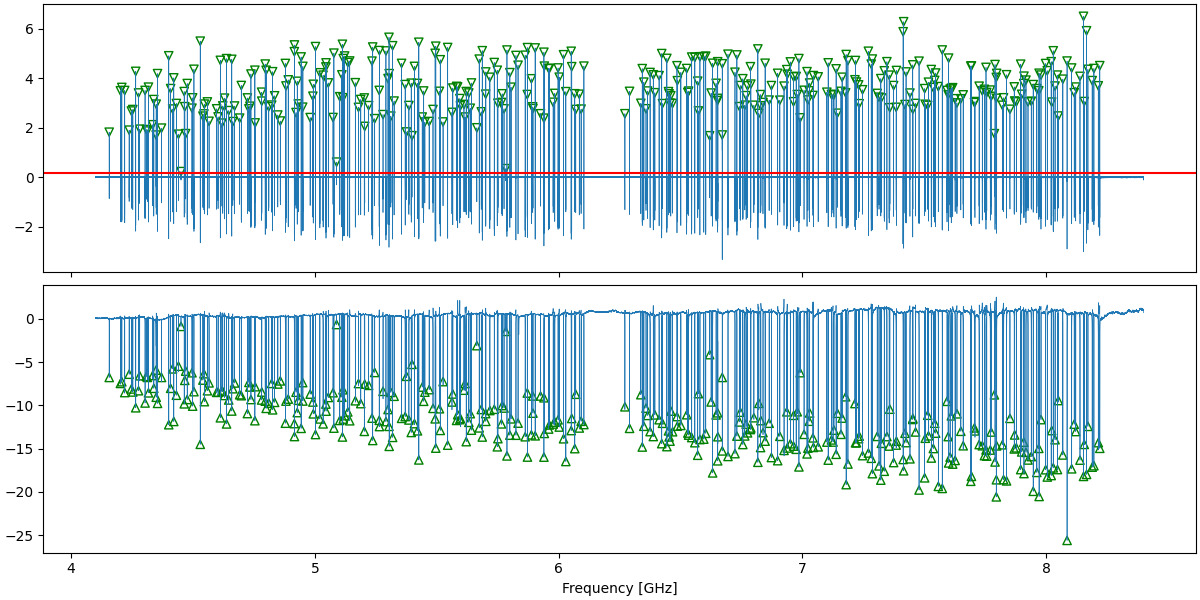

In [3]:
sw = 3 # even number
mph = 0.15
window = np.ones(sw)/sw
smooth_s21 = convolve(dark_s21, window, mode='same')
ds21 = np.diff(smooth_s21, 1)
smooth_ds21 = convolve(ds21, window, mode='same')
d2s21 = np.diff(smooth_ds21, 1)

locs, props = find_peaks(d2s21, height=mph, prominence=mph)
heights = props['peak_heights']

locs += 1
f0s = freqs[locs]
s21_mins = smooth_s21[locs]
fig, ax = plt.subplot_mosaic('a;b', sharex=True, figsize=(12, 6), constrained_layout=True)
ax['a'].plot(freqs[:-2], d2s21, lw=.5)
ax['b'].plot(freqs, smooth_s21, lw=.5)
ax['a'].axhline(mph, c='r')

ax['a'].scatter(freqs[:-2][locs-1], heights, marker='v', c='None', edgecolor='g')
ax['b'].scatter(f0s, s21_mins, marker='^', c='None', edgecolor='g')
ax['b'].set_xlabel('Frequency [GHz]')
print(len(locs))

In [4]:
files = natsorted(glob('./S21s/*_*2024.npy'))
files = files + natsorted(glob('./S21s_2ndhalf/*_*2024.npy'))[3:]
print(files)
nr_steps = len(files)
nr_kids = len(locs)
sweeps = np.empty((nr_steps, len(freqs)))
smoothed_sweeps = np.empty((nr_steps, len(freqs)))
s21s = np.empty((nr_steps, nr_kids))
s21s[:] = np.nan
smooth_dark_s21 = convolve(dark_s21, window, mode='same')
s0 = s21_mins
for i, file in enumerate(files):
    s21 = np.load(file)
    sweeps[i, :] = s21
    smooth_s21 = convolve(s21, window, mode='same')
    smoothed_sweeps[i, :] = smooth_s21
    s21s[i, :]  = smooth_s21[locs] - s0 

['./S21s\\S21_x1y0_w1_blue_10h34_11-10-2024.npy', './S21s\\S21_x2y0_w1_blue_10h34_11-10-2024.npy', './S21s\\S21_x3y0_w1_blue_10h34_11-10-2024.npy', './S21s\\S21_x4y0_w1_blue_10h34_11-10-2024.npy', './S21s\\S21_x5y0_w1_blue_10h34_11-10-2024.npy', './S21s\\S21_x6y0_w1_blue_10h34_11-10-2024.npy', './S21s\\S21_x7y0_w1_blue_10h34_11-10-2024.npy', './S21s\\S21_x8y0_w1_blue_10h34_11-10-2024.npy', './S21s\\S21_x9y0_w1_blue_10h34_11-10-2024.npy', './S21s\\S21_x10y0_w1_blue_10h34_11-10-2024.npy', './S21s\\S21_x11y0_w1_blue_10h34_11-10-2024.npy', './S21s\\S21_x12y0_w1_blue_10h34_11-10-2024.npy', './S21s\\S21_x13y0_w1_blue_10h34_11-10-2024.npy', './S21s\\S21_x14y0_w1_blue_10h34_11-10-2024.npy', './S21s\\S21_x15y0_w1_blue_10h34_11-10-2024.npy', './S21s\\S21_x16y0_w1_blue_10h34_11-10-2024.npy', './S21s\\S21_x17y0_w1_blue_10h34_11-10-2024.npy', './S21s\\S21_x18y0_w1_blue_10h34_11-10-2024.npy', './S21s\\S21_x19y0_w1_blue_10h34_11-10-2024.npy', './S21s\\S21_x20y0_w1_blue_10h34_11-10-2024.npy', './S21s\

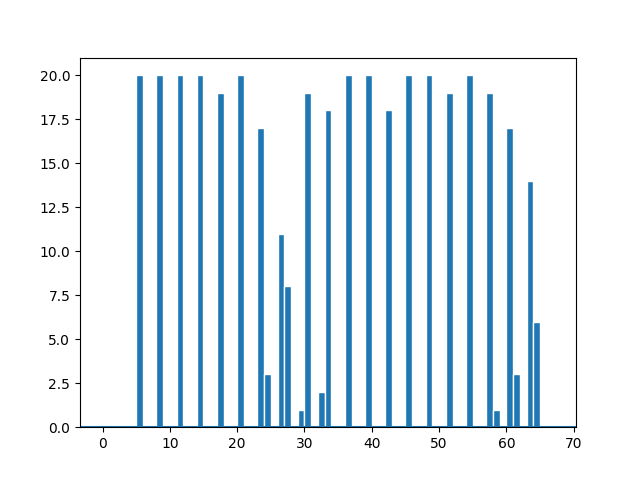

In [5]:
pos = np.empty((nr_kids,7)) # columns: meas idx, meas f0, x, y, design idx, design f0, design finger length
pos[:] = np.nan
pos[:, 0] = np.arange(nr_kids, dtype=int)
pos[:, 1] = f0s
for i in range(nr_kids):
    pos[i, 3] = np.nanargmax(s21s[:, i])
fig, ax = plt.subplots()
_ = ax.hist(pos[:, 3], bins=np.arange(nr_steps+1), facecolor='tab:blue', edgecolor='w')
ax.axhline()

In [6]:
# add_doulbes = [(212, 3)]
# for id, y in add_doulbes:
#     pos = np.insert(pos, id, pos[id], axis=0)
#     pos[id+1, 3] = y 
#     pos[id:, 0] += 1
#     f0s = np.insert(f0s, id, f0s[id])
#     locs = np.insert(locs, id, locs[id])
#     s21s = np.insert(s21s, id, s21s[:, id], axis=1)
    

C:\Users\wilbertr\AppData\Local\Temp\ipykernel_29004\2361860031.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax['a'].scatter(pos[:, 1], pos[:, 3], c='y', cmap='viridis')


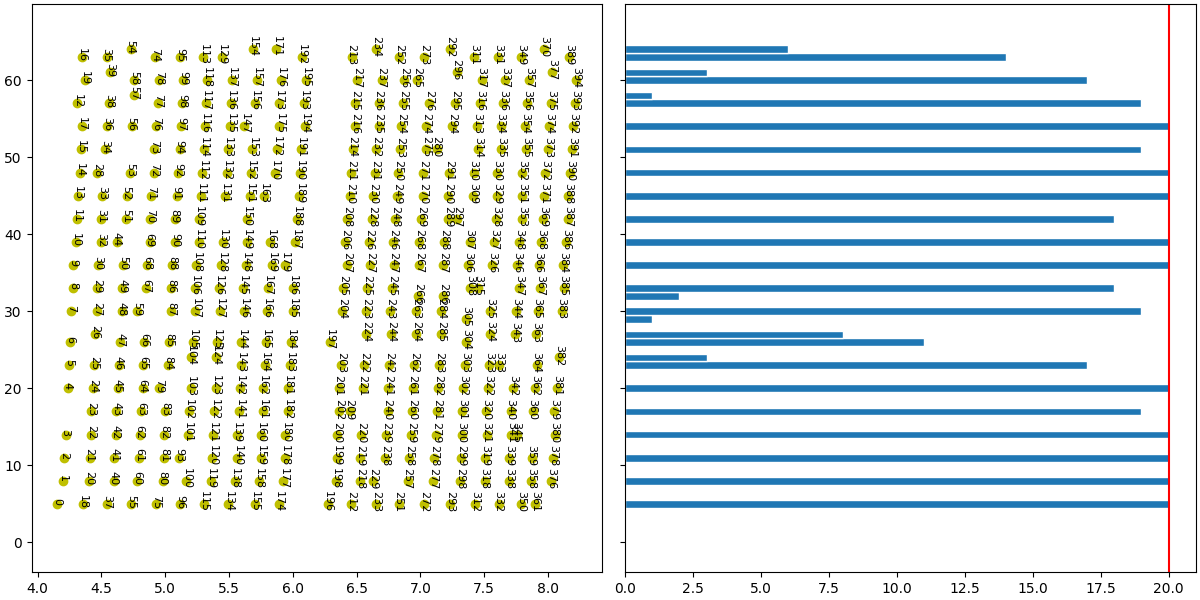

In [7]:
fig, ax = plt.subplot_mosaic('ab', figsize=(12, 6), constrained_layout=True, sharey=True)   
ax['a'].scatter(pos[:, 1], pos[:, 3], c='y', cmap='viridis')
for i, txt in enumerate(pos[:, 0]):
    ax['a'].annotate(int(txt), (pos[i, 1], pos[i, 3]+.3), fontsize=8, ha='center', va='center', rotation=-90)
ax['b'].hist(pos[:, 3], bins=np.arange(nr_steps+1)-.5, facecolor='tab:blue', edgecolor='w', orientation='horizontal')
ax['b'].axvline(M_pxs, c='r')


In [8]:
ys = [0, 6.6, 9.4, 12.4, 15.3, 18.2, 21.6, 25, 28, 31.8, 34.5, 37.8, 40.8, 44.1, 46.8, 50.1, 52.5, 55.6, 58.8, 62.3, 65.3, 70]
for id, kid in enumerate(pos):
    i = 0
    while kid[3] > ys[i]:
        i+=1
    pos[id, 3] = i-1


C:\Users\wilbertr\AppData\Local\Temp\ipykernel_29004\3466318640.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax['a'].scatter(pos[:, 2], pos[:, 3], c='y', cmap='viridis')


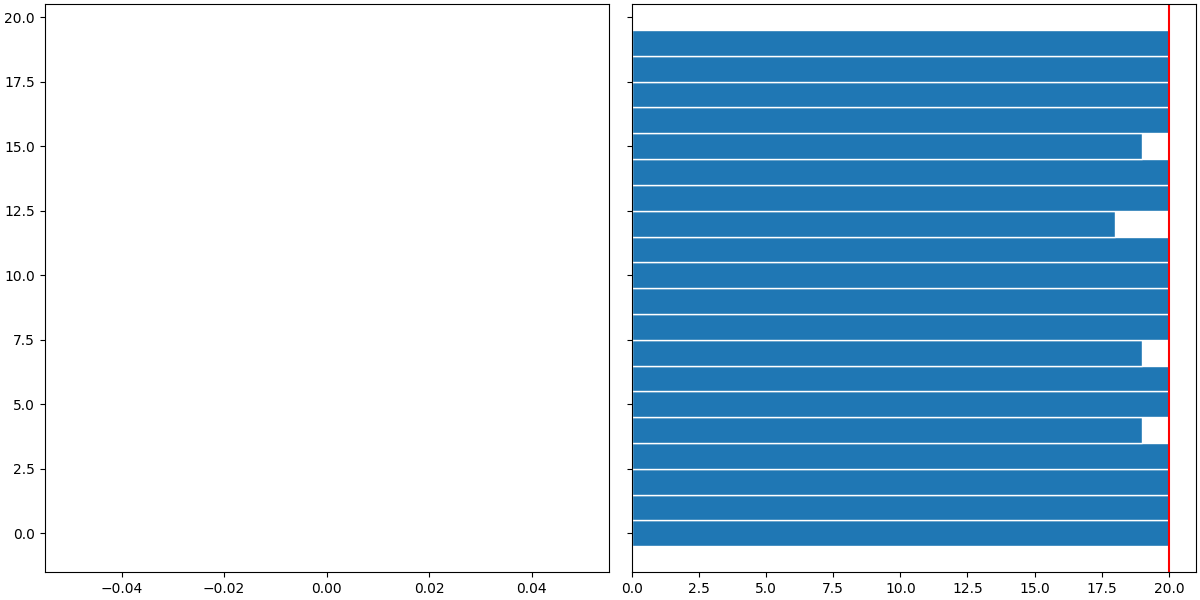

In [9]:
fig, ax = plt.subplot_mosaic('ab', figsize=(12, 6), constrained_layout=True, sharey=True)   
ax['a'].scatter(pos[:, 2], pos[:, 3], c='y', cmap='viridis')
for i, txt in enumerate(pos[:, 0]):
    ax['a'].annotate(int(txt), (pos[i, 2], pos[i, 3]+.3), fontsize=8, ha='center', va='center', rotation=-90)
ax['b'].hist(pos[:, 3], bins=np.arange(M_pxs+1)-.5, facecolor='tab:blue', edgecolor='w', orientation='horizontal')
ax['b'].axvline(M_pxs, c='r')

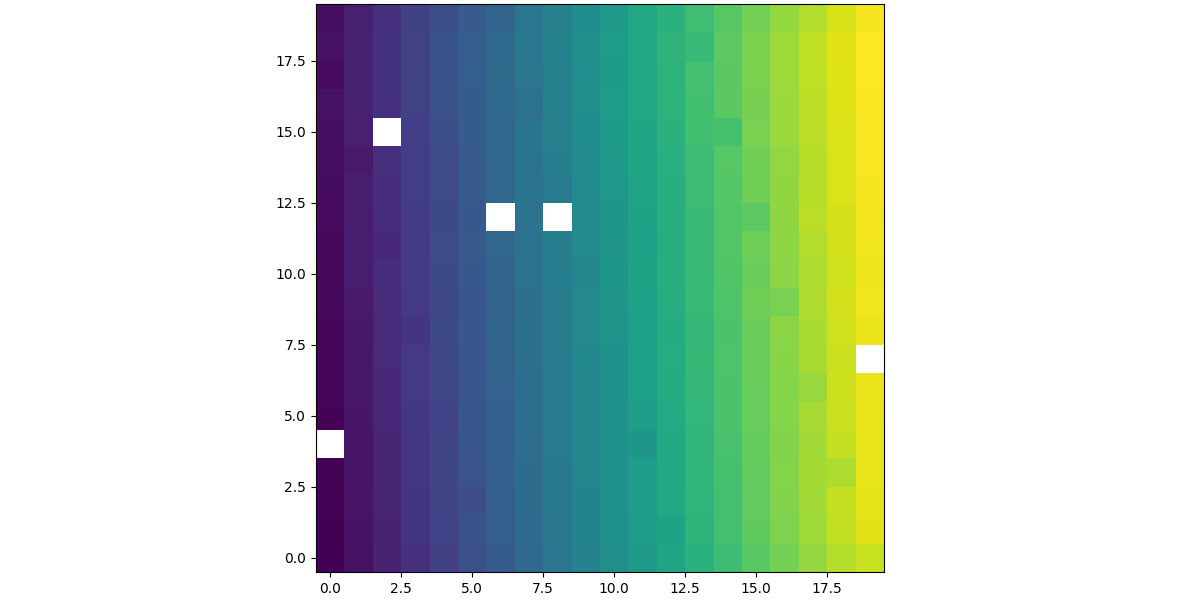

In [10]:
rows = [[] for _ in range(20)]
for i in pos:
    rows[int(i[3])].append(int(i[0]))
kids_derolled = np.empty((M_pxs, N_pxs))
kids_derolled[:] = np.nan   
for i, row in enumerate(rows):
    kids_derolled[i, :len(row)] = row
kids_derolled
nans = [[4, 0], [7, 19], [12, 6], [12, 8], [15, 2]]
for i, j in nans:
    kids_derolled[i, j+1:] = kids_derolled[i, j:-1]
    kids_derolled[i, j] = np.nan
kids_derolled

fig, ax = plt.subplot_mosaic('a', figsize=(12, 6), constrained_layout=True, sharey=True)   
ax['a'].imshow(kids_derolled, cmap='viridis', origin='lower')
# for i, txt in enumerate(pos[:, 0]):
#     ax['a'].annotate(int(txt), (pos[i, 2], pos[i, 3]+.3), fontsize=8, ha='center', va='center', rotation=-90)


In [11]:
# remove_kids = [345, 232]
# for i in remove_kids:
#     kids_derolled[kids_derolled == i] = np.nan
#     # s21s[:, i] = np.nan

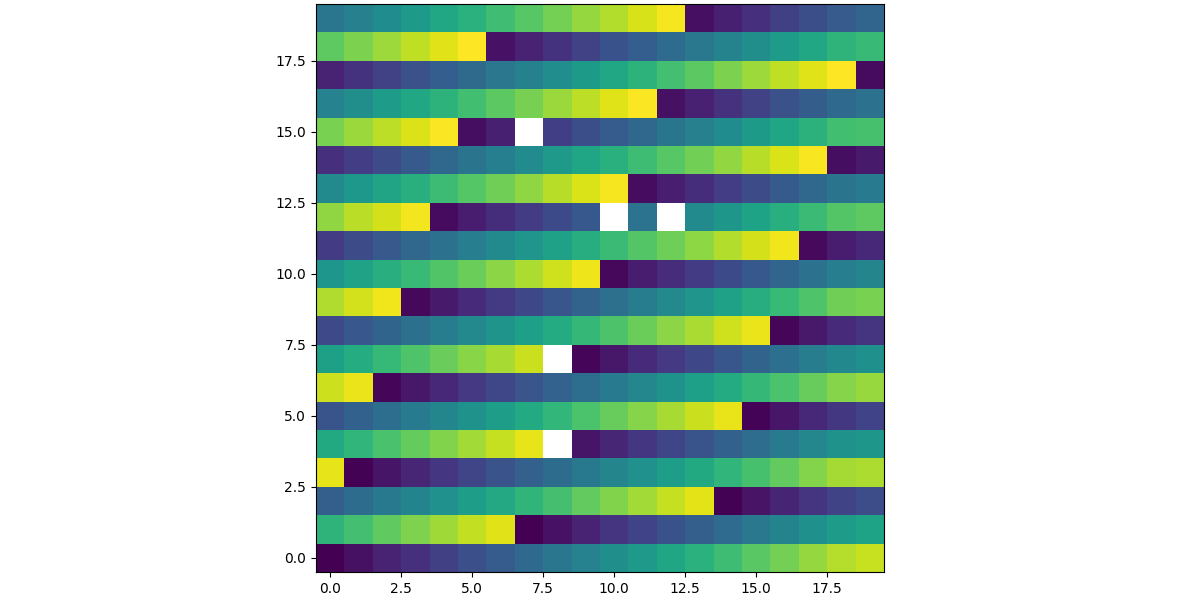

In [12]:
kids = copy(kids_derolled)
for i, row in enumerate(kids_derolled):
    kids[i] = np.roll(row, i*7)
kids[~np.isnan(kids)] = kids[~np.isnan(kids)].astype(int)
kids
# kids[0] = np.nan
# kids[-1] = np.nan
# kids[:, -1] = np.nan
fig, ax = plt.subplot_mosaic('a', figsize=(12, 6), constrained_layout=True, sharey=True)   
ax['a'].imshow(kids, cmap='viridis', origin='lower')

In [13]:
kid_id_board = np.load('KID_ID_BOARD_20x20.npy').astype(int)
finger_length = np.load(r'.\LT361_4-8GHz_400px_fingers.npy')
design_f0s = np.load('LT361_4-8GHz_400px_F0s.npy')*1e-9
design_f0s_original = np.load('LT361_FAB_F0s.npy')*1e-9
kid_id_board

array([[  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
        260, 280, 300, 320, 340, 360, 380],
       [261, 281, 301, 321, 341, 361, 381,   1,  21,  41,  61,  81, 101,
        121, 141, 161, 181, 201, 221, 241],
       [122, 142, 162, 182, 202, 222, 242, 262, 282, 302, 322, 342, 362,
        382,   2,  22,  42,  62,  82, 102],
       [383,   3,  23,  43,  63,  83, 103, 123, 143, 163, 183, 203, 223,
        243, 263, 283, 303, 323, 343, 363],
       [244, 264, 284, 304, 324, 344, 364, 384,   4,  24,  44,  64,  84,
        104, 124, 144, 164, 184, 204, 224],
       [105, 125, 145, 165, 185, 205, 225, 245, 265, 285, 305, 325, 345,
        365, 385,   5,  25,  45,  65,  85],
       [366, 386,   6,  26,  46,  66,  86, 106, 126, 146, 166, 186, 206,
        226, 246, 266, 286, 306, 326, 346],
       [227, 247, 267, 287, 307, 327, 347, 367, 387,   7,  27,  47,  67,
         87, 107, 127, 147, 167, 187, 207],
       [ 88, 108, 128, 148, 168, 188, 208, 228, 248, 268, 288, 3

In [14]:
for i, row in enumerate(pos):
    x, y = np.argwhere(kids == row[0])[0]
    row[2] = int(x)
    design_id = kid_id_board[x, y]
    row[4] = int(design_id)
    row[5] = design_f0s[design_id]
    row[6] = finger_length[design_id]
pos[0]


array([  0.        ,   4.15617035,   0.        ,   0.        ,
         0.        ,   4.1       , 727.48119315])

6.121300794894367e-05

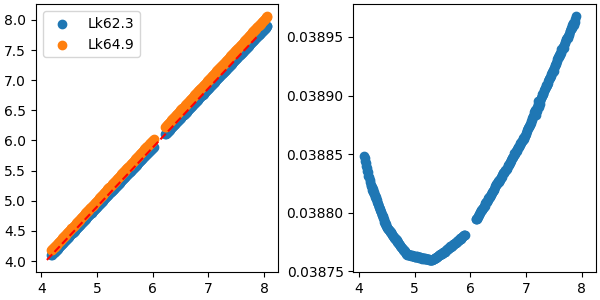

In [15]:
dLk_Lk = (design_f0s - design_f0s_original)/design_f0s
fig, ax = plt.subplot_mosaic('ab', figsize=(6, 3), constrained_layout=True, sharex=True)
ax['a'].scatter(design_f0s_original, design_f0s, label='Lk62.3')
ax['a'].scatter(design_f0s_original, design_f0s_original, label='Lk64.9')
ax['a'].legend()

def func(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

popt, pcov = curve_fit(func, design_f0s_original, design_f0s)
y = func(design_f0s, *popt)
ax['a'].plot(design_f0s, y, c='r', ls='--')
dLk_Lk = (design_f0s_original - y)/design_f0s_original
ax['b'].scatter(design_f0s, dLk_Lk)
np.std(dLk_Lk)

In [16]:
nanmask = np.isnan(kids)
design = design_f0s[kid_id_board[~nanmask]]
original = design_f0s_original[kid_id_board[~nanmask]]
meas = f0s[kids[~nanmask].astype(int)]
df_f = (design-meas) / design
print(np.std(df_f))

0.0066251646746393


line
0.0037821132081591615


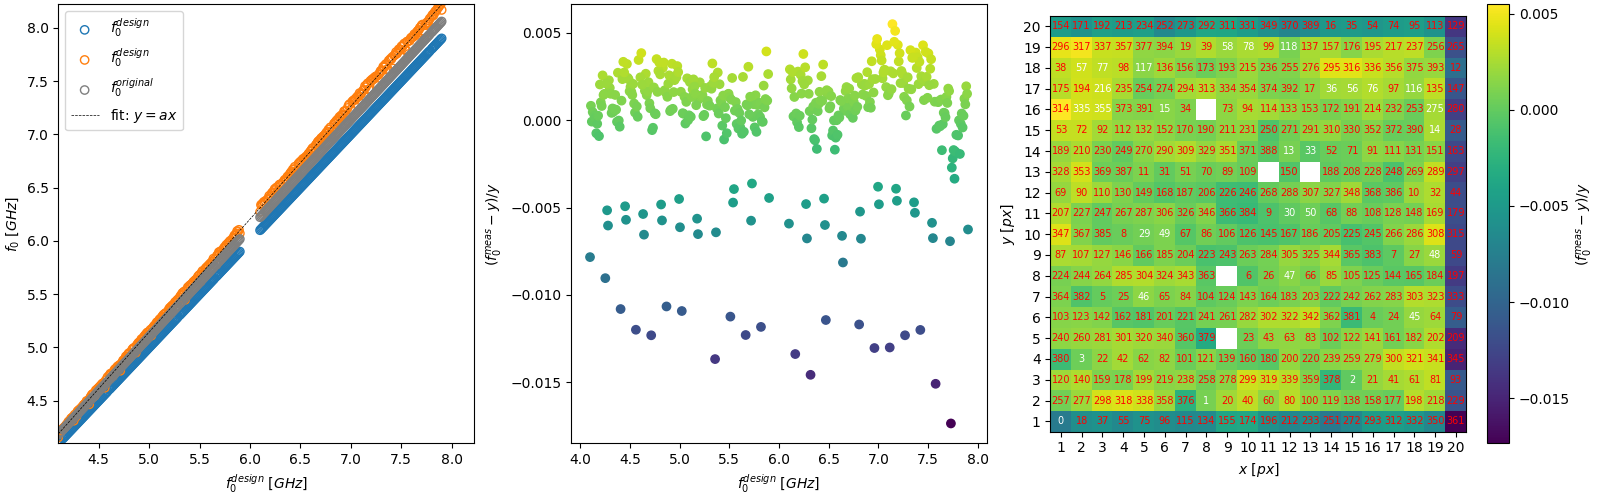

In [17]:
def linear(x, a, b):
    return a*x+b

def secorder(x, a, b, c):
    return a*x**2+b*x

line = linear
popt, pcov = curve_fit(line, design.flatten(), meas.flatten())
meas_fit = line(design, *popt)
df_f_corr = (meas - meas_fit) / meas_fit
df_fmap = np.empty((M_pxs, N_pxs))
df_fmap[:] = np.nan
count = 0
for i, row in enumerate(kids):
    for j, k in enumerate(row):
        if ~np.isnan(k):
            df_fmap[i, j] = df_f_corr[count]
            count+=1
flim = np.array([np.min((design, meas)), np.max((design, meas))])

if line:
    if line == linear:
        eq = 'y=ax'
        save = 'fit_linear'
    elif line == secorder:
        eq = 'y=ax^2+bx'
        save = 'fit_secorder'
    print('line')
    popt, pcov = curve_fit(line, design.flatten(), meas.flatten())
    fit = line(design, *popt)
    xfit = np.linspace(flim[0], flim[1])
    yfit = line(xfit, *popt)
    label = 'y'
else:
    fit = design
    label = 'f_0^{design}'
    save = 'nofit'
size=20


fig, ax = plt.subplot_mosaic('abc', figsize=(16, 5), constrained_layout=True)
ax['a'].scatter(design, design, c='None', edgecolor='tab:blue', label='$\it f_0^{design}$')
ax['a'].scatter(design, meas, c='None', edgecolor='tab:orange', label='$\it f_0^{design}$')
ax['a'].scatter(design, original, c='None', edgecolor='tab:gray', label='$\it f_0^{original}$')
if line:
    ax['a'].plot(xfit, yfit, c='k', label='fit: $%s$' % eq, ls='--', lw=0.5)
ax['a'].set_xlabel('$\it f_0^{design}$ $[GHz]$')
ax['a'].set_ylabel('$\it f_0$ $[GHz]$')
ax['a'].set_xlim(flim)
ax['a'].set_ylim(flim)
ax['a'].legend(loc='upper left')
ax['b'].scatter(design, df_f_corr, c=df_f_corr, label='residual, $f_0-y_2$')
# for i, x in enumerate(design):
#     ax['b'].annotate(i, (x, df_f_corr[i]), fontsize=8, ha='center', va='center')
ax['b'].annotate
ax['b'].set_ylabel('$\it (f_0^{meas}-%s)/%s$' % (label, label))
ax['b'].set_xlabel('$\it f_0^{design}$ $[GHz]$')
im = ax['c'].imshow(df_fmap, cmap='viridis', origin='lower')
for i, x in enumerate(df_fmap):
    for j, y in enumerate(x):
        if ~np.isnan(y):
            old_id = kid_id_board[i, j]
            new_id = kids[i, j]
            if old_id == new_id:
                c = 'w'
            else:
                c = 'r'
            ax['c'].text(j, i, '%d' % new_id, ha='center', va='center', fontsize=7, color=c)
# Major ticks
ax['c'].set_xticks(np.arange(0, size, 1));
ax['c'].set_yticks(np.arange(0, size, 1));
# Labels for major ticks
ax['c'].set_xticklabels(np.arange(1, size+1, 1));
ax['c'].set_yticklabels(np.arange(1, size+1, 1));
# labels
ax['c'].set_xlabel('$\it x$ $[px]$')
ax['c'].set_ylabel('$\it y$ $[px]$')
cbar = fig.colorbar(im, ax=ax['c'])
# cbar.ax.invert_yaxis()
_ = cbar.ax.set_ylabel('$\it (f_0^{meas}-%s)/%s$' % (label, label))
# _ = cbar.ax.set_ylabel('$\it (f_0^{meas}-%s)/%s$' % (label, label))
print(np.std(df_f_corr))

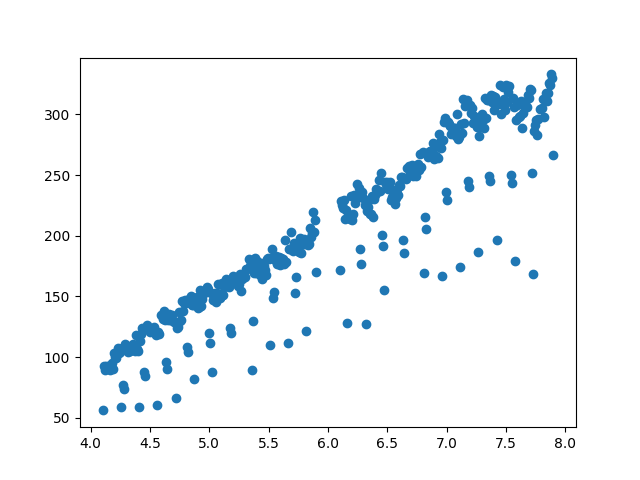

In [20]:
fig, ax = plt.subplots()
ax.scatter(design, (meas-design)*1e3)

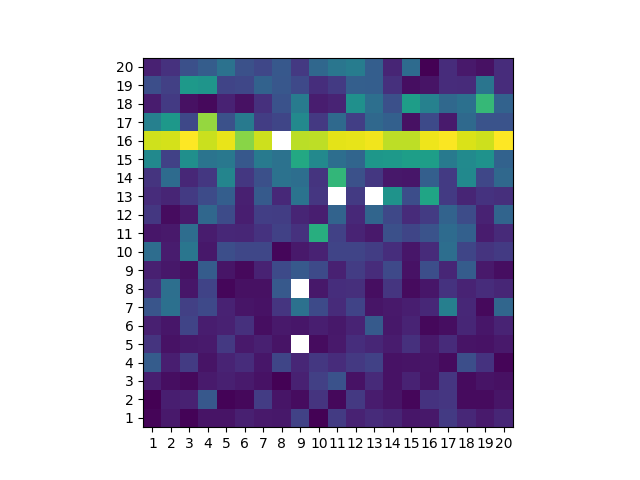

In [19]:
nr_scans = s21s.shape[0]

def map():
    maps = np.zeros((M_pxs, N_pxs, nr_scans))
    for nr in range(nr_scans):
        for i, m in enumerate(kids):
            for j, k in enumerate(m):
                if ~np.isnan(k):
                    k = int(k)
                    s21s[:, k] -= np.amin(s21s[:, k])
                    s21s[:, k] /= np.amax(s21s[:, k])
                    maps[i, j, nr] = s21s[nr, int(k)]
                else:
                    maps[i, j, nr] = np.nan
    return maps
maps = map()
fig, ax = plt.subplots()
ax.imshow(maps[:, :, 50], origin='lower', cmap='viridis')
ax.set_xticks(np.arange(0, size, 1));
ax.set_yticks(np.arange(0, size, 1));
# Labels for major ticks
ax.set_xticklabels(np.arange(1, size+1, 1));
ax.set_yticklabels(np.arange(1, size+1, 1));

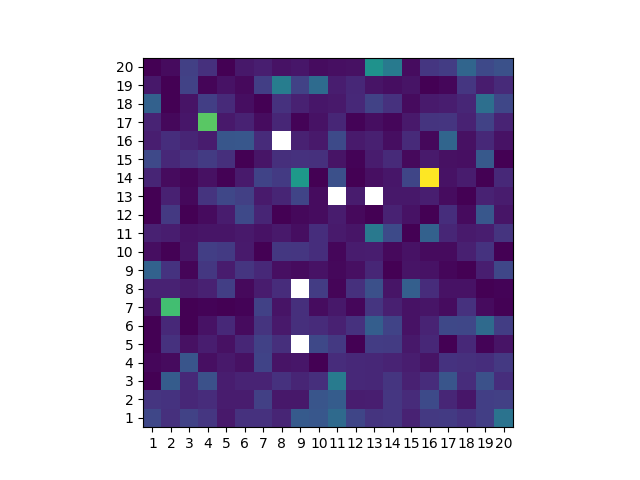

MovieWriter Pillow unavailable; using Pillow instead.


In [20]:
import matplotlib.animation as animation

fig, ax = plt.subplots()
cax = ax.imshow(maps[:, :, 0], origin='lower', cmap='viridis')
ax.set_xticks(np.arange(0, size, 1));
ax.set_yticks(np.arange(0, size, 1));
# Labels for major ticks
ax.set_xticklabels(np.arange(1, size+1, 1));
ax.set_yticklabels(np.arange(1, size+1, 1));

def update(frame):
    cax.set_array(maps[:, :, frame])
    return cax,
ani = animation.FuncAnimation(fig, update, frames=nr_scans, interval=200, blit=True)
plt.show()
ani.save('animation_chip4.gif', writer='Pillow')

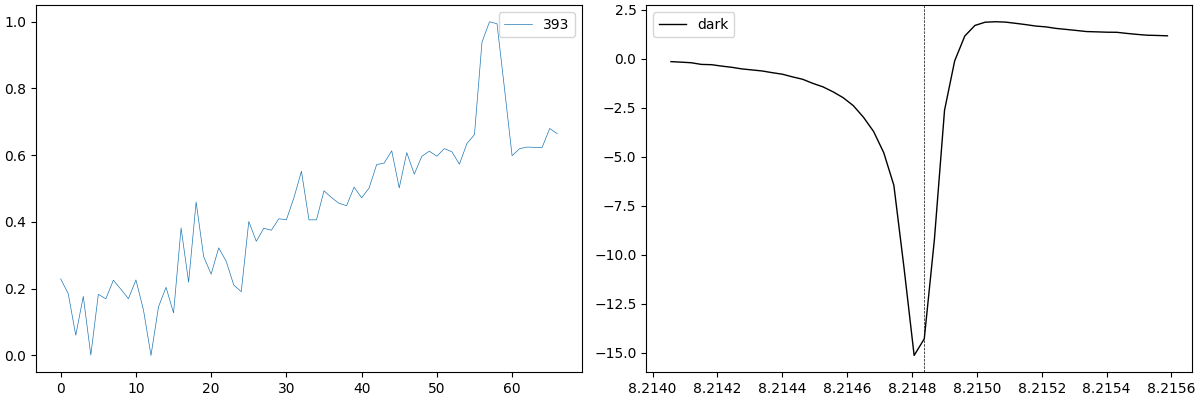

In [21]:
ids = np.arange(376, dtype=int)
ids = [393]
fig, ax = plt.subplot_mosaic('ba', figsize=(12, 4), constrained_layout=True)
start = 0
stop = 20
# steps = np.arange(start, stop)
steps = []
bw = 25
colors = plt.cm.viridis(np.linspace(0, 1, len(steps)))
for id in ids:
    res = f0s[id]
    loc = locs[id]
    ax['a'].plot(freqs[loc-bw:loc+bw], smooth_dark_s21[loc-bw:loc+bw], lw=1, c='k', label='dark')
    ax['a'].axvline(res, c='k', ls='--', lw=.5)
    for i, step in enumerate(steps):
        ax['a'].plot(freqs[loc-bw:loc+bw], smoothed_sweeps[step, loc-bw:loc+bw], lw=1, label=str(step), c=colors[i])
        ax['b'].axvline(step, ls='--', lw=.5, c=colors[i])
    ax['b'].plot(s21s[:, id], lw=.5, label=str(id))
ax['b'].legend()
ax['a'].legend()

In [18]:
trims = np.load(r'C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\mask-design\20x20_ebeam\LT361\LT361_20x20_4-8GHz_trimming\trim_array_edge_effect.npy')
# print(trims)
max_trim = (np.amax(trims[~np.isnan(trims)]))
print('max trim: %.2f' % max_trim)
trim_min = 4.5
finger_length = 111
nr_fingers = 7
max_cut = 104

kid_id_board = np.load('KID_ID_BOARD_20x20.npy').astype(int)
new_trims = copy(trims)
fingers = np.load(r'.\LT361_4-8GHz_400px_fingers.npy')
cuts = nr_fingers*finger_length - fingers 

idx2fingers = max_cut - (cuts[kid_id_board] % max_cut)<trims*1e-3
ids2fingers = kid_id_board[idx2fingers]
print('trims that span two fingers', ids2fingers)

idx2little = (cuts[kid_id_board] + trims*1e-3) % max_cut < trim_min
arg2little = np.argwhere(idx2little)
ids2little = kid_id_board[idx2little]
print('KIDs with trims less then trim minimum', ids2little)
# np.save('ids2little.npy', ids2little)
trims2little = trims[idx2little]*1e-3
print('corresopnding trims', trims2little)

max trim: 4212.69
trims that span two fingers []
KIDs with trims less then trim minimum [300 301 302 303  44  84  45  85  12  13 136 137 298 138 299]
corresopnding trims [1.05343237 0.08       0.08       0.08       0.         0.
 0.         0.         0.         0.         0.08       0.78632293
 0.08       0.08       0.64568812]


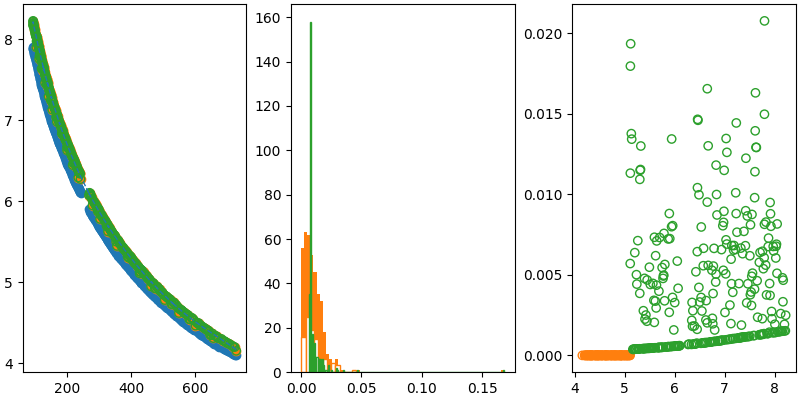

In [22]:
trim2 = int(np.amax(kids[trims==0 ]))
trim_from = trim2 + 1

fig, axes = plt.subplot_mosaic('abc', figsize=(8, 4), constrained_layout=True)
ax=axes['a']
design_fingers = fingers[kid_id_board[~nanmask]]
design_trims = trims[~np.isnan(kids)] * 1e-3
sort_idx = np.argsort(meas)
ax.scatter(design_fingers[sort_idx], design[sort_idx])
ax.scatter(design_fingers[sort_idx], meas[sort_idx])

def poly(x, a, b, c, d, e, f):
    return a*x**5 + b*x**4 + c*x**3+d*x**2+e*x+f

popt, pcov = curve_fit(poly, design_fingers[sort_idx], meas[sort_idx])
f_meas = poly(design_fingers[sort_idx], *popt)   
new_fingers = design_fingers[sort_idx]-design_trims[sort_idx]
f_trim = poly(new_fingers, *popt) - (f_meas - meas[sort_idx])
ax.plot(design_fingers[sort_idx], f_meas, c='tab:blue', ls='--', lw=1)	
ax.scatter(new_fingers, f_trim, c='None', edgecolors='tab:green')
ax = axes['b']
_ = ax.hist(meas[sort_idx][1:]-meas[sort_idx][:-1], bins='auto', facecolor='tab:orange', alpha=1)
_ = ax.hist(f_trim[1:trim_from]-f_trim[:trim2], bins='auto', facecolor='w',edgecolor='tab:orange', alpha=1)
_ = ax.hist(f_trim[trim2+2:]-f_trim[trim_from:-1], bins='auto', facecolor='w',edgecolor='tab:green', alpha=1)
ax = axes['c']
ax.scatter(meas[sort_idx][:trim_from], (f_trim- meas[sort_idx])[:trim_from], c='None', edgecolors='tab:orange') 
ax.scatter(meas[sort_idx][trim_from:], (f_trim- meas[sort_idx])[trim_from:], c='None', edgecolors='tab:green')
master_trim_array = np.stack((np.arange(len(f_trim)), pos[:, 4], meas[sort_idx], f_trim, design_trims[sort_idx], design_fingers[sort_idx]), axis=1)
master_trim_array[0]
np.save('master_trim_array.npy', master_trim_array)

In [364]:
edgemask = np.zeros((M_pxs, N_pxs), dtype=bool)
edgemask[0] = 1
edgemask[:, -1] = 1
edgemask[:, 0] = 1
edgemask[-1] = 1
edge_f0s = f0s[kids[(edgemask) & (~nanmask)].astype(int)]
center_f0s = f0s[kids[(~edgemask) & (~nanmask)].astype(int)]
center_f0s.shape

(319,)

In [351]:
center_ids = np.sort(kids[(~edgemask) & (~nanmask)].astype(int))
design_ids = np.sort(kid_id_board[~nanmask].astype(int))

In [352]:
sort_idx = np.argsort(center_f0s)
center_f0s = center_f0s[sort_idx]

41


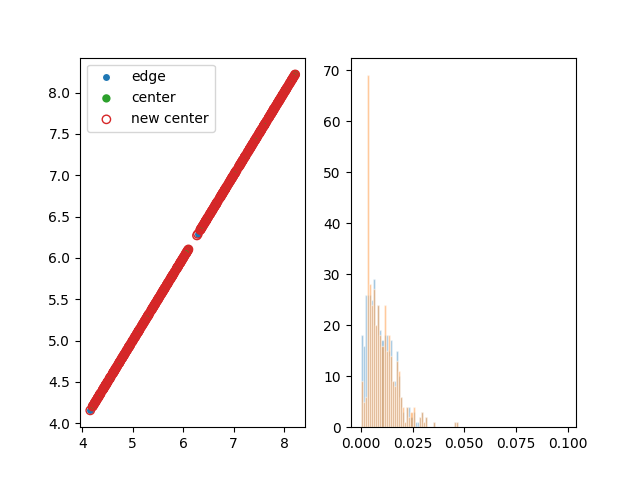

In [354]:
dfmin = 3e-3
dfmax = 10e-3
new_f0s = copy(f0s)
trimmed = 0 
for id in center_ids:
    f0 = f0s[id]
    if id == 0:
        new_f0s[id]  = f0
    else:
        prev_f0 = new_f0s[id-1]
        df = f0 - prev_f0
        if df < dfmin:
            new_f0s[id] = prev_f0 + dfmin
            trimmed += 1
print(trimmed)
fig, ax = plt.subplot_mosaic('ab')
ax['a'].scatter(edge_f0s, edge_f0s, label='edge', facecolor='tab:blue', edgecolor='w', alpha=1)   
ax['a'].scatter(center_f0s, center_f0s, label='center', facecolor='tab:green', edgecolor='None', lw=1, alpha=1)   
ax['a'].scatter(f0s, new_f0s, label='new center', facecolor='None', edgecolor='tab:red', lw=1, alpha=1)   
ax['a'].legend()
_ = ax['b'].hist(f0s[1:]-f0s[:-1], bins=np.arange(0, 0.1, 0.001), facecolor='tab:blue', edgecolor='w', alpha=.5)
_ = ax['b'].hist(new_f0s[1:]-new_f0s[:-1], bins=np.arange(0, 0.1, 0.001), facecolor='tab:orange', edgecolor='w', alpha=.5)

161


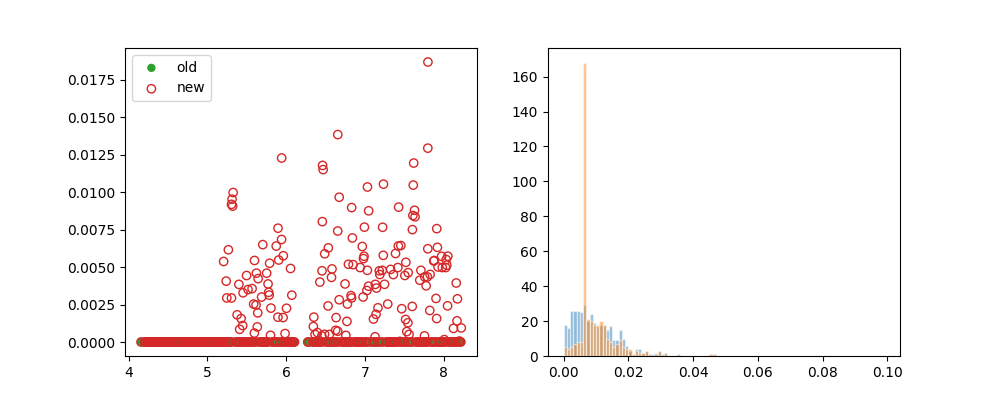

In [392]:
dfmin = 7e-3
trimmed = 0 
f0s_untrim = f0s[:100]
f0s_trim = f0s[100:]
new_f0s = copy(f0s_trim)

for i, f0 in enumerate(f0s_trim):
    if i == 0:
        new_f0s[i]  = f0
    else:
        prev_f0 = new_f0s[i-1]
        df = f0 - prev_f0
        if df < dfmin:
            new_f0s[i] = prev_f0 + dfmin
            trimmed += 1
print(trimmed)
new_f0s = np.concatenate((f0s_untrim, new_f0s))
fig, ax = plt.subplot_mosaic('ab', figsize=(10, 4))
ax['a'].scatter(f0s, f0s-f0s, label='old', facecolor='tab:green', edgecolor='None', lw=1, alpha=1)   
ax['a'].scatter(f0s, new_f0s-f0s, label='new', facecolor='None', edgecolor='tab:red', lw=1, alpha=1)   
ax['a'].legend()
_ = ax['b'].hist(f0s[1:]-f0s[:-1], bins=np.arange(0, 0.1, 0.001), facecolor='tab:blue', edgecolor='w', alpha=.5)
_ = ax['b'].hist(new_f0s[1:]-new_f0s[:-1], bins=np.arange(0, 0.1, 0.001), facecolor='tab:orange', edgecolor='w', alpha=.5)

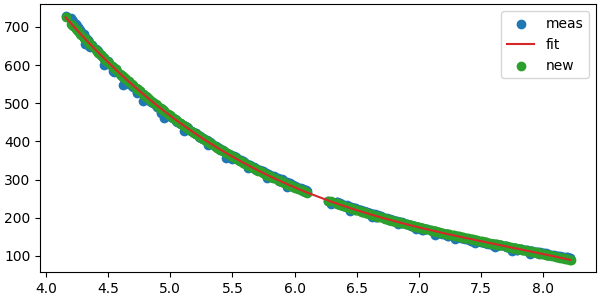

In [432]:
def trim_func(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

x = pos[:, 2]
y = pos[:, 6]
popt, pcov = curve_fit(trim_func, x, y)

fig, ax = plt.subplot_mosaic('a', figsize=(6, 3), constrained_layout=True, sharex=True)
ax['a'].scatter(x, y, label='meas')
ax['a'].plot(x, trim_func(x, *popt), label='fit', c='tab:red')
new_fingers = trim_func(new_f0s, *popt)
ax['a'].scatter(new_f0s, new_fingers, label='new', c='tab:green')
ax['a'].legend()